In [60]:
import glob
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import numpy as np

# AMP Toxicity RIPP

In [61]:
# Get data file names
path = '../data/predictions/amp_ripp/'
filenames = glob.glob(path + "*.tsv")

dfs_raw = {'esm2': dict(), 'esm3': dict()}
dfs = {'esm2': dict(), 'esm3': dict()}
sets = {'esm2': dict(), 'esm3': dict()}

top_perc = 0.20

dfs_top_perc = {'esm2': dict(), 'esm3': dict()}
sets_top_perc = {'esm2': dict(), 'esm3': dict()}
for filename in filenames:
    model = os.path.basename(filename).split('_')[0]
    ds = os.path.basename(filename).split('_')[1]
    df = pd.read_csv(filename, sep='\t')
    size_top_perc = int(len(df) * top_perc)
    dfs_raw[model][ds] = df.copy()
    if ds == 'tox':
        df = df[df['prediction'] == 0]  # Keep only non-toxic
    else:
        df = df[df['prediction'] == 1]  # Keep only AMP active
    dfs[model][ds] = df
    sets[model][ds] = set(df['protein_id'].values)
    
    df = df.sort_values(by='probability', ascending=False)
    df = df.iloc[:size_top_perc, :]
    
    dfs_top_perc[model][ds] = df
    sets_top_perc[model][ds] = set(df['protein_id'].values)
    
    cnt = Counter(dfs_raw[model][ds]['prediction'])
    print(f'{model} {ds}: {dict(cnt)}')
    
for_lab = set(dfs_raw['esm2']['tox']['protein_id'].values)  # Get all protein IDs
for_lab_top_perc = for_lab.copy()
for ds in ['tox', 'amp']:
    for_lab = for_lab.intersection(sets['esm2'][ds].intersection(sets['esm3'][ds]))
    for_lab_top_perc = for_lab_top_perc.intersection(sets_top_perc['esm2'][ds].intersection(sets_top_perc['esm3'][ds]))
        
print(f'Top {int(top_perc * 100)}% ({len(sets_top_perc[model][ds])} peptides) in {model} {ds}')
print(f'AMP active and non-toxic predicted by ESM2 and ESM3: {len(for_lab)}')
print(f'AMP active and non-toxic predicted by ESM2 and ESM3 within top {top_perc * 100}% ({len(sets_1top_perc[model][ds])} peptides from each): {len(for_lab_top_perc)}')

esm2 tox: {0: 9908, 1: 2812}
esm3 tox: {0: 9740, 1: 2980}
esm3 amp: {1: 6813, 0: 5907}
esm2 amp: {1: 6260, 0: 6460}
Top 20% (2544 peptides) in esm2 amp
AMP active and non-toxic predicted by ESM2 and ESM3: 3095
AMP active and non-toxic predicted by ESM2 and ESM3 within top 20.0% (1272 peptides from each): 38


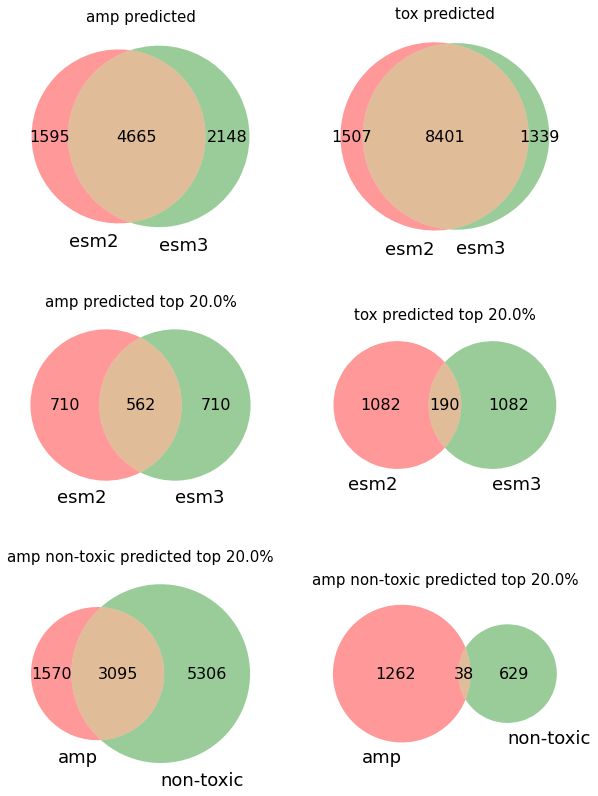

In [62]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 14))
for ind_st, st in enumerate([sets, sets_1top_perc]):     
    for ind, ds in enumerate(['amp', 'tox']):
        venn = venn2([st['esm2'][ds], st['esm3'][ds]], set_labels=tuple(st.keys()), ax=axs[ind_st][ind])
        for text in venn.set_labels:
            text.set_fontsize(18)
        for text in venn.subset_labels:
            text.set_fontsize(16)
        axs[ind_st][ind].set_title(f"{ds} predicted" + (f' top {top_perc*100}%' if ind_st > 0 else ''), size=15)
   

for ind, st in enumerate([sets, sets_top_perc]): 
    venn = venn2([st['esm2']['amp'].intersection(st['esm3']['amp']), 
                  st['esm2']['tox'].intersection(st['esm3']['tox'])], set_labels=tuple(['amp', 'non-toxic']), ax=axs[2][ind])
    for text in venn.set_labels:
        text.set_fontsize(18)
    for text in venn.subset_labels:
        text.set_fontsize(16)
    axs[2][ind].set_title(f"amp non-toxic predicted" + (f' top {top_perc*100}%' if ind_st > 0 else ''), size=15)

plt.savefig('amp_tox_ripp_venn.png', dpi=150, bbox_inches='tight')
plt.show()

In [66]:
orig_df = pd.read_csv('../data/ripp_corepep.tsv', sep='\t', header=None)
for_lab_df = orig_df[ orig_df[0].isin(for_lab_top_perc)]  # Labels (column 3) given here are random! Ignore them!
for_lab_df.to_csv('amp_non_toxic.tsv', sep='\t', index=False, header=False)
for_lab_df

,0,1,2,3
5882,SRR23617280.bin.29_k141_328097.region001-gene2,11,SSAVASSAVTV,1
5975,SRR23823798.bin.10_k141_178736.region001-gene20,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,0
6050,SRR23823802.bin.23_k141_58835.region001-gene16,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,1
6083,SRR23823804.bin.7_k141_13186.region001-gene5,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,0
6219,SRR23823813.bin.7_k141_39352.region001-gene5,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,1
6230,SRR23823814.bin.25_k141_83051.region001-gene18,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,1
6433,SRR23823830.bin.42_k141_99872.region001-gene17,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,0
6457,SRR23823832.bin.11_k141_27281.region001-gene20,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,1
6472,SRR23823834.bin.20_k141_26932.region001-gene9,22,SGVSSAVAGVIIDSIPGPAIPG,1
6541,SRR23823841.bin.19_k141_72094.region001-gene5,31,GVVENGVFTKVDKVLVGNPKKVKTLKNKNKK,0
